In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from data import combine_with_reverb, create_bertified_dataset
from utils import read_data
from copy import copy
import numpy as np 
from collections import Counter

In [2]:
combine_with_reverb()
create_bertified_dataset()

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): huggingface.co:443
DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /bert-base-uncased/resolve/main/vocab.txt HTTP/1.1" 200 0
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): huggingface.co:443
DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /bert-base-uncased/resolve/main/vocab.txt HTTP/1.1" 200 0


In [2]:
QUESTION_WORDS = ['what', 'which', 'where', 'when', 'why', 'who', 'how', 'whom']

In [3]:
def question_word_id(string):
    for item in string.strip().lower().split():
        if item in QUESTION_WORDS:
            return item
    return 'None'

In [6]:
train_df = pd.read_excel('data/train.xlsx'); valid_df = pd.read_excel('data/valid.xlsx'); test_df = pd.read_excel('data/test.xlsx')

In [7]:
test_df.head(3)

,Unnamed: 0,Unnamed: 0.1,Meaningful,Reverb_no,Sentecne,Confidence,Question,Answer,Frequency,token_matrix,triple,normalized_triple,first_entity_ids,second_entity_ids,relation_ids
0,13882,16826,1,267285,Protocols vary by jurisdiction,0.93349,how do Protocols vary,by jurisdiction,2,"[101, 2129, 2079, 16744, 8137, 102]","('Protocols', 'vary by', 'jurisdiction')","('protocol', 'vary by', 'jurisdiction')","[101, 16744, 102]","[101, 7360, 102]","[101, 8137, 2011, 102]"
1,8502,10311,1,8600,A Shooting Star is another brand of broom,0.95320,of what is A Shooting Star another brand,broom,1,"[101, 1997, 2054, 2003, 1037, 5008, 2732, 2178...","('A Shooting Star', 'is another brand of', 'br...","('a shooting star', 'be another brand of', 'br...","[101, 1037, 5008, 2732, 102]","[101, 23528, 102]","[101, 2003, 2178, 4435, 1997, 102]"
2,4405,5379,1,212931,Marshall was the hometown of Angie Debo,0.91363,where was the hometown of Angie Debo,Marshall,1,"[101, 2073, 2001, 1996, 9627, 1997, 14835, 213...","('Marshall', 'was the hometown of', 'Angie Debo')","('marshall', 'be the hometown of', 'angie debo')","[101, 5832, 102]","[101, 14835, 2139, 5092, 102]","[101, 2001, 1996, 9627, 1997, 102]"


In [8]:
def get_unique_ent_rel(dataframe):
    arg1 = [eval(item)[0] for item in dataframe['triple'].to_list()]
    arg2 = [eval(item)[2] for item in dataframe['triple'].to_list()]
    rel = [eval(item)[1] for item in dataframe['triple'].to_list()]
    print(f'Unique arg1 : {len(set(arg1))}')
    print(f'Unique arg2 : {len(set(arg2))}')
    print(f'Unique rel : {len(set(rel))}')
    print(f'Unique args : {len(set(arg1+arg2))}')


In [9]:
get_unique_ent_rel(train_df)

Unique arg1 : 6549
Unique arg2 : 5971
Unique rel : 4568
Unique args : 12155


In [10]:
get_unique_ent_rel(valid_df)

Unique arg1 : 1624
Unique arg2 : 1566
Unique rel : 1297
Unique args : 3147


In [11]:
get_unique_ent_rel(test_df)

Unique arg1 : 4064
Unique arg2 : 3827
Unique rel : 2939
Unique args : 7702


In [12]:
def get_question_words_distribution(dataframe):
    dataframe['question words'] = dataframe['Question'].astype(str).apply(question_word_id)
    print(dataframe.groupby(['question words'])['Meaningful'].count())
    ax = dataframe.groupby(['question words'])['Meaningful'].count().plot.bar(x='lab', y='val', rot=0)
    return 0

question words
None       27
how       238
what     4618
when      561
where    1659
which      26
who      2423
whom      360
why         9
Name: Meaningful, dtype: int64


0

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 1.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 0.

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Georgia' (georgiaz.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Malgun Gothic' (malgunbd.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Javanese Text' (javatext.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (seguisli.ttf) italic normal 350 normal>) = 11.0975
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bahnschrift' (bahnschrift.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Times New Roman' (timesi.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Yu Gothic' (YuGothR.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lucida Console' (lucon.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft YaHei'

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Courier New' (couri.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Corbel' (corbelz.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Nirmala UI' (NirmalaS.ttf) normal normal 350 normal>) = 10.0975
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (segoeuib.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Simplified Arabic' (simpbdo.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'MT Extra' (MTEXTRA.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Book Antiqua' (ANTQUAI.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Book Antiqua' (ANTQUABI.TTF) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Aldhabi' (aldhabi.ttf) n

DEBUG:matplotlib.font_manager:findfont: score(<Font 'MS Reference Sans Serif' (REFSAN.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Palatino Linotype' (palai.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bookman Old Style' (BOOKOSB.TTF) normal normal 600 normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gadugi' (gadugib.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft New Tai Lue' (ntailub.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Myanmar Text' (mmrtextb.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft Himalaya' (himalaya.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI Historic' (seguihis.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:find

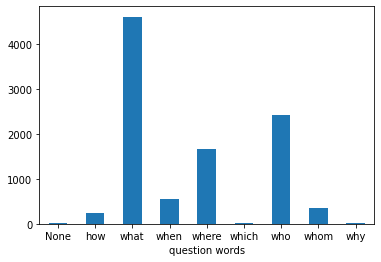

In [13]:
get_question_words_distribution(train_df)

question words
None       6
how       40
what     825
when     101
where    281
which      5
who      421
whom      70
why        2
Name: Meaningful, dtype: int64


0

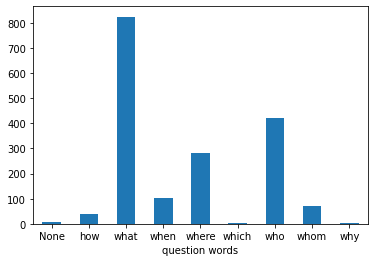

In [14]:
get_question_words_distribution(valid_df)

question words
None       14
how       112
what     2331
when      285
where     865
which      17
who      1217
whom      152
why        10
Name: Meaningful, dtype: int64


0

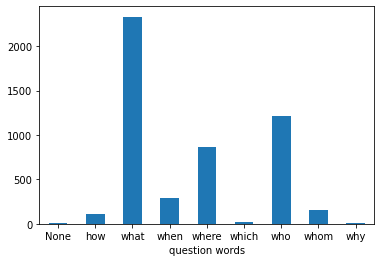

In [15]:
get_question_words_distribution(test_df)

In [17]:
def get_count_of_unique_words(dataframe):
    tokenizer = lambda string:string.strip().lower().split()
    tokenized_questions = dataframe['Question'].astype(str).apply(tokenizer).to_list()
    flatten_tokenized_questions = [item for sublist in tokenized_questions for item in sublist]
    return len(set(flatten_tokenized_questions))

In [18]:
print(get_count_of_unique_words(train_df))
print(get_count_of_unique_words(valid_df))
print(get_count_of_unique_words(test_df))

10123
2958
6314


In [19]:
def get_length(dataframe):
    tokenizer = lambda string:len(string.strip().lower().split())
    dataframe['length'] = dataframe['Question'].astype(str).apply(tokenizer)
    dataframe.hist(column=['length'], bins=50)
    return dataframe['length']
     

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 1.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 0.

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Georgia' (georgiaz.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Malgun Gothic' (malgunbd.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Javanese Text' (javatext.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (seguisli.ttf) italic normal 350 normal>) = 11.0975
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bahnschrift' (bahnschrift.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Times New Roman' (timesi.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Yu Gothic' (YuGothR.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lucida Console' (lucon.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft YaHei'

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Courier New' (couri.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Corbel' (corbelz.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Nirmala UI' (NirmalaS.ttf) normal normal 350 normal>) = 10.0975
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (segoeuib.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Simplified Arabic' (simpbdo.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'MT Extra' (MTEXTRA.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Book Antiqua' (ANTQUAI.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Book Antiqua' (ANTQUABI.TTF) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Aldhabi' (aldhabi.ttf) n

DEBUG:matplotlib.font_manager:findfont: score(<Font 'MS Reference Sans Serif' (REFSAN.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Palatino Linotype' (palai.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bookman Old Style' (BOOKOSB.TTF) normal normal 600 normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gadugi' (gadugib.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft New Tai Lue' (ntailub.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Myanmar Text' (mmrtextb.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft Himalaya' (himalaya.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI Historic' (seguihis.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:find

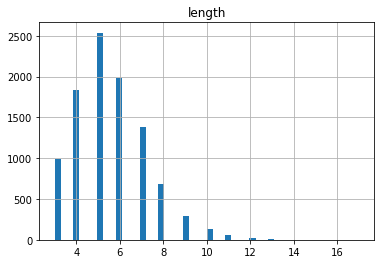

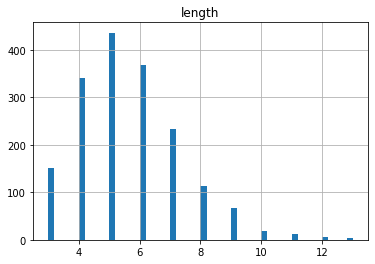

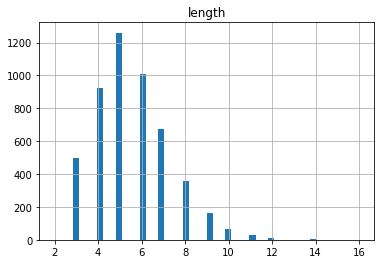

In [20]:
tr = get_length(train_df)
va = get_length(valid_df)
te = get_length(test_df)

In [21]:
train, valid, test = read_data()
print(len(train[0]), len(valid[0]), len(test[0]))

9921 1751 5003


In [22]:
def get_relation_component_count(dataset):
    results = []
    for item in dataset[1]:
#         print(item[2:])
        temp = ''.join(map(str, item[2:].tolist())).split('0')
        temp = list(filter(lambda item:item!='', temp))
        results.append(len(temp))
    components = []
    occurrences = []
    for item in set(results):
        components.append(str(item))
        occurrences.append(results.count(item))
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(components,occurrences)
    plt.show() 
    return components,occurrences


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


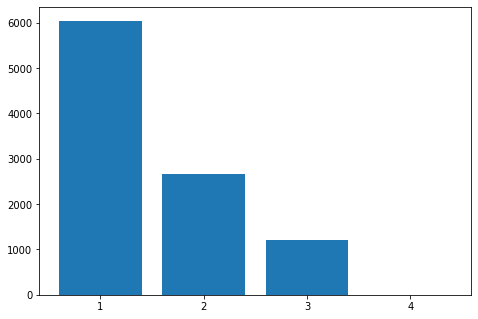

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


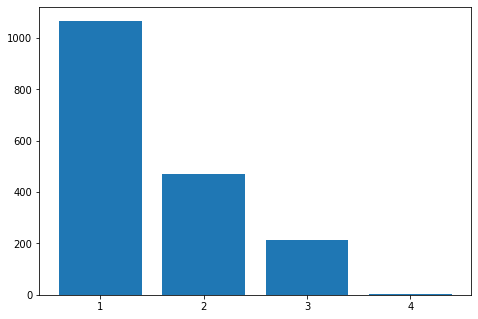

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


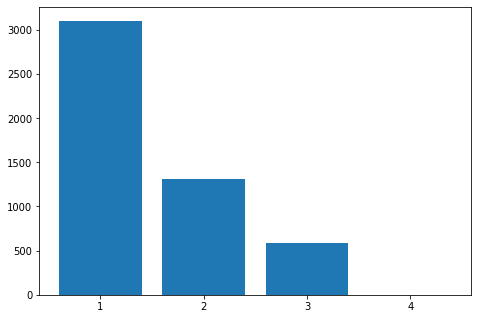

In [23]:
tr = get_relation_component_count(train)
va = get_relation_component_count(valid)
te = get_relation_component_count(test)

In [24]:
def get_relation_length(dataset):
    results = []
    for tok, rel in zip(dataset[0], dataset[1]):
        length = sum((tok!=0).astype(int))
        temp = sum(rel[2:])/length
        results.append(temp)
    results = map(lambda item:round(item, 1), results)
    results = list(results)
    components = []
    occurrences = []
    for item in sorted(set(results)):
        components.append(str(item))
        occurrences.append(results.count(item))
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
#     ax.set_xticks(ax.get_xticks()[::2])
    ax.bar(components,occurrences)
    plt.show() 
    return components,occurrences

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


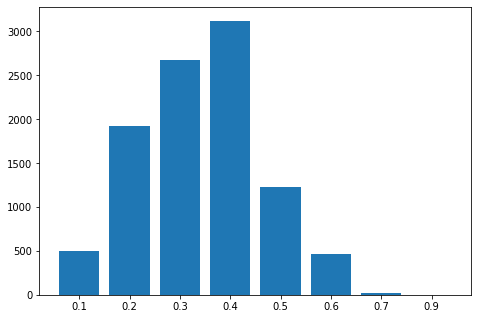

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


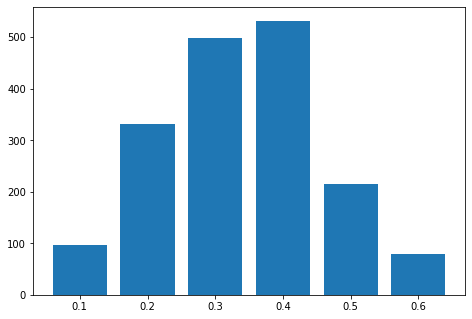

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


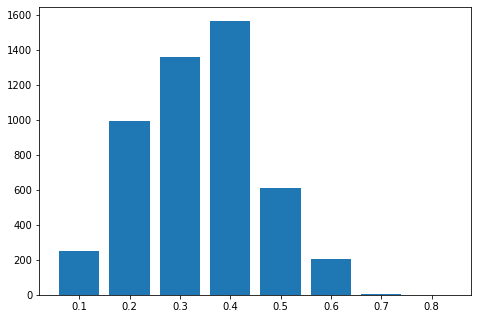

In [25]:
tr = get_relation_length(train); va = get_relation_length(valid); te = get_relation_length(test) 

In [39]:
error_dataframe = {
                    'Question':[],
                    'candidates':[],
                    'actual':[],
                    'node':[],
                    'edge':[]
                }
with open('./results/Valid_Set_With.txt', 'r') as res:
    for line in res:
        if line.find('Question')!=-1:
            temp = eval(line.split(': ')[1].strip())
            error_dataframe['Question'].append(' '.join(temp))
        elif line.find('Sorted candidates')!=-1:
            error_dataframe['candidates'].append(eval(line.split(': ')[1].strip()))
        elif line.find('Node: ')!=-1:
            line = line.replace(', Edge','').split(': ')
            error_dataframe['node'].append(line[1])
            error_dataframe['edge'].append(line[2])
        elif line.find('Actual line number')!=-1:
            error_dataframe['actual'].append(eval(line.split(': ')[1].strip()))
error_dataframe['Meaningful'] = [1 for _ in error_dataframe['actual']]
# for k,v in error_dataframe.items():
#     print(k, len(v), v[:5])
#     error_dataframe[k]=v[:5350]
error_df = pd.DataFrame(error_dataframe)            

In [40]:
def rec_rank(key,dic):
    try:
        return dic[key]/float(sum(dic.values()))
    except:
        return 1/1000
def get_mean_rec_rank(dataframe):
    dataframe['rr'] = dataframe.apply(lambda row:rec_rank(row['actual'],Counter([item[0] for item in row['candidates']])), axis=1)
    print(dataframe['rr'].mean())

In [41]:
get_mean_rec_rank(error_df)

0.46961326424482935


In [42]:
def get_was_born(string):
    tokenized = string.strip().lower().split()
    if ('was' in tokenized) and ('born' in tokenized):
            return True
    return False
error_df['was born']=error_df['Question'].apply(get_was_born)

In [43]:
get_null_candidates = lambda candidates:len(candidates)==0
null_questions = copy(error_df[error_df['candidates'].apply(get_null_candidates)])
not_null_questions = copy(error_df[~error_df['candidates'].apply(get_null_candidates)])

In [44]:
null_questions.to_excel('./results/null.xlsx')

question words
how        8
what     105
when      28
where     59
who        4
whom      18
why        1
Name: Meaningful, dtype: int64


0

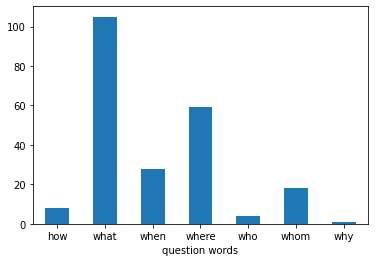

In [45]:
get_question_words_distribution(null_questions)

In [46]:
def get_all_hit1(dataframe):
    index_list = []
    for index, row in dataframe.iterrows():
        if row['candidates'][0][0]==row['actual']:
                index_list.append(True)
        else:
            index_list.append(False)
    return index_list

In [47]:
not_null_questions[get_all_hit1(not_null_questions)].to_excel('./results/hit1.xlsx')

In [48]:
not_null_questions[[not elem for elem in get_all_hit1(not_null_questions)]].to_excel('./results/not_null_not_hit1.xlsx')

In [50]:
# type(tokens_and_nouns[0])

In [51]:
df = pd.read_csv(r'C:\git\reverb_wikipedia_tuples-1.1.txt', sep='\t', header=None)
reverb_columns_name = ['ExID', 'arg1', 'rel', 'arg2', 'narg1', 'nrel', 'narg2', 'csents', 'conf', 'urls']
df.columns = reverb_columns_name
df = df.dropna()
df = df.drop_duplicates()


In [52]:
print(f'Unique arg1 : {len(df["arg1"].unique())}')
print(f'Unique arg2 : {len(df["arg2"].unique())}')
print(f'Unique rel : {len(df["rel"].unique())}')
print(f'Unique args : {len(set(df["arg1"].unique().tolist()+df["arg2"].unique().tolist()))}')
print(f'Unique narg1 : {len(df["narg1"].unique())}')
print(f'Unique narg2 : {len(df["narg2"].unique())}')
print(f'Unique nrel : {len(df["nrel"].unique())}')
print(f'Unique nargs : {len(set(df["narg1"].unique().tolist()+df["narg2"].unique().tolist()))}')



Unique arg1 : 182329
Unique arg2 : 156166
Unique rel : 101977
Unique args : 304853
Unique narg1 : 173067
Unique narg2 : 149581
Unique nrel : 82699
Unique nargs : 278143


In [53]:
normal_vocab = df["narg1"].unique().tolist()+df["narg2"].unique().tolist()+df["nrel"].unique().tolist()
normal_vocab = list(map(lambda x:x.split(), normal_vocab))
normal_vocab = [item for sublist in normal_vocab for item in sublist]
print(len(set(normal_vocab)))

125056


In [54]:
vocab = df["arg1"].unique().tolist()+df["arg2"].unique().tolist()+df["rel"].unique().tolist()
vocab = list(map(lambda x:x.split(), vocab))
vocab = [item for sublist in vocab for item in sublist]
print(len(set(vocab)))

148953
